In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, RepeatedStratifiedKFold,StratifiedKFold,cross_val_predict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')
sns.set()

ModuleNotFoundError: No module named 'catboost'

In [119]:
from sklearn.preprocessing import LabelEncoder

In [2]:
import os
os.getcwd()

'C:\\Users\\Uche Chris'

# Reading Dataset

In [65]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [66]:
train.head()

,id,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
0,0,0,C0,C0,C1,C5,C11,37.56,54.756667,54.756667,...,0,0,0,0,0,0,0,0,0,0
1,1,0,C0,C0,C3,C5,C1,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,0,C0,C0,C3,C5,C2,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,3,0,C0,C0,C1,C5,C1,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,1,C0,C0,C3,C3,C11,37.48,37.480000,37.161333,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
0,5,C0,C0,C0,C5,C2,37.638,36.361667,42.688333,31.66,...,0,0,0,0,0,0,0,0,0,0
1,7,C0,C0,C3,C5,C11,32.540,32.540000,39.403333,30.82,...,0,0,0,0,0,0,0,0,0,0
2,9,C0,C0,C1,C5,C1,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,11,C0,C0,C3,C5,C2,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,14,C0,C0,C1,C5,C10,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train.shape, test.shape

((70000, 509), (30000, 508))

In [19]:
train.describe()

,id,target,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
count,70000.000000,70000.000000,25424.000000,26389.000000,27792.000000,25424.000000,26389.000000,27792.000000,25424.000000,26389.000000,...,70000.000000,70000.0,70000.000000,70000.0,70000.000000,70000.0,70000.000000,70000.000000,70000.0,70000.000000
mean,50025.281314,0.298186,40.124969,39.975888,38.937569,32.120109,31.533970,30.517150,2.891956,2.847829,...,-3.138300,0.0,-3.138300,0.0,3.138300,0.0,3.138300,-3.138300,0.0,3.138300
std,28878.675532,0.457465,21.415242,20.591512,20.364727,13.766195,13.330736,13.692785,2.294987,2.267976,...,17.344944,0.0,17.344944,0.0,17.344944,0.0,17.344944,17.344944,0.0,17.344944
min,0.000000,0.000000,-217.460000,-89.690000,-66.497000,-219.180000,-89.690000,-49.390000,-30.850000,-19.813333,...,-99.000000,0.0,-99.000000,0.0,0.000000,0.0,0.000000,-99.000000,0.0,0.000000
25%,24999.750000,0.000000,32.470000,32.470000,31.923333,30.750000,28.600000,27.215000,2.500000,2.500000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
50%,50030.500000,0.000000,37.480000,37.560000,37.030667,34.160000,33.320000,31.710000,2.500000,2.500000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
75%,75027.250000,1.000000,48.062750,48.490000,47.726458,35.830000,35.830000,35.830000,2.500000,2.500000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
max,99999.000000,1.000000,403.880000,639.756667,511.091667,148.360000,136.030000,136.030000,47.000000,53.556667,...,0.000000,0.0,0.000000,0.0,99.000000,0.0,99.000000,0.000000,0.0,99.000000


# NA values

In [67]:
def get_missings(df):
    labels,values = list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isnull().sum():
                labels.append(column)
                values.append((df[column].isnull().sum() / len(df[column]))*100)
        missings=pd.DataFrame({'Feature':labels,'MissingPercent':values }).sort_values(by='MissingPercent',ascending=False)
        return missings
    else:
        return False

In [68]:
#NA values report
Missings_df=get_missings(train)
Missings_df.head(6)

,Feature,MissingPercent
52,feature_193,100.000000
55,feature_196,100.000000
56,feature_197,100.000000
57,feature_198,100.000000
21,feature_83,98.320000
18,feature_75,70.297143


# Distribution of NA values

Text(0, 0.5, 'The number of features')

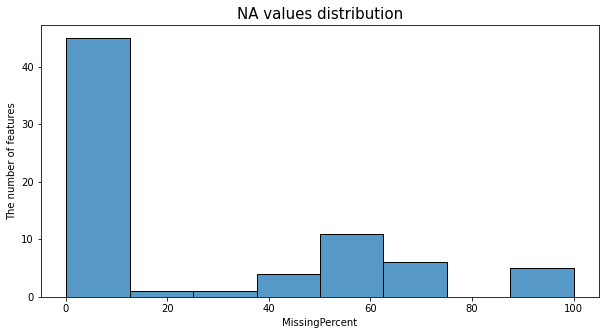

In [69]:
plt.figure(figsize=(10,5))
sns.histplot(x=Missings_df.MissingPercent).set_title('NA values distribution',size=15)
plt.ylabel('The number of features')

##### Drop features with more than 25% missing values

In [70]:
Missings_NA=Missings_df[Missings_df.MissingPercent>25]
#Drop from train and test 
train=train.drop(list(Missings_NA.Feature),axis=1)
test=test.drop(list(Missings_NA.Feature),axis=1)

In [71]:
train.head()

,id,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_14,feature_15,feature_16,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
0,0,0,C0,C0,C1,C5,C11,0.0,0.000,C0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,C0,C0,C3,C5,C1,0.0,0.000,C2,...,0,0,0,0,0,0,0,0,0,0
2,2,0,C0,C0,C3,C5,C2,0.0,0.000,C1,...,0,0,0,0,0,0,0,0,0,0
3,3,0,C0,C0,C1,C5,C1,0.0,0.000,C0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,C0,C0,C3,C3,C11,0.0,0.258,C2,...,0,0,0,0,0,0,0,0,0,0


In [72]:
#Categorical features name
Categorical_Features=train.select_dtypes(include=['object']).columns
        
#Numeric features name
Numeric_Features=train.select_dtypes(exclude=['object']).columns[2:] #skip id,target

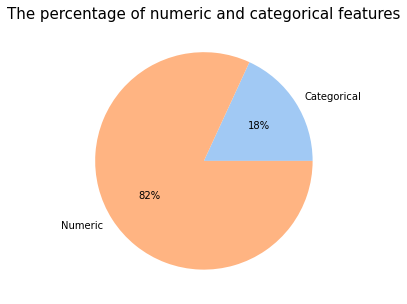

In [73]:
#Pichart
data = [len(Categorical_Features),len(Numeric_Features)]
colors = sns.color_palette('pastel')
plt.figure(figsize=(10,5))
plt.title('The percentage of numeric and categorical features',size=15)
plt.pie(data, colors = colors, labels=['Categorical','Numeric'] ,autopct = '%0.0f%%')
plt.show()

In [74]:
#Fill missing NA categorical features with mode
def get_mode(feature,df):
    return df[feature].mode()[0]

for col in Categorical_Features:
    train[col].fillna(get_mode(col,train),inplace=True)
    test[col].fillna(get_mode(col,test),inplace=True)

In [75]:
#Fill missing NA numeric features with mean
for col in Numeric_Features:
    train[col].fillna(train[col].mean(),inplace=True)
    test[col].fillna(test[col].mean(),inplace=True)

In [76]:
train.isnull()

,id,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_14,feature_15,feature_16,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
#Find columns that contain date objects
mask = train[Categorical_Features][:10].astype(str).apply(lambda x : x.str.match('(\d{2,4}(-|\/|\\|\.| )\d{2}(-|\/|\\|\.| )\d{2,4})+').any())
datetime_Features=train[Categorical_Features].loc[:,mask]

datetime_Features

,feature_191,feature_192,feature_199,feature_200,feature_201
0,11/10/2017,11/10/2017,11/10/2017,17/01/2016,11/10/2017
1,25/03/2015,25/03/2015,02/04/2017,25/03/2015,25/03/2015
2,27/01/2015,27/01/2015,24/03/2016,27/01/2015,27/01/2015
3,05/02/2014,01/04/2014,01/04/2014,01/04/2014,01/04/2014
4,20/07/2009,10/09/2013,10/09/2013,24/01/2016,10/09/2013
...,...,...,...,...,...
69995,27/09/2010,01/02/2014,01/02/2014,14/02/2014,01/02/2014
69996,19/09/2016,19/09/2016,19/09/2016,19/09/2016,19/09/2016
69997,14/09/2005,25/07/2015,25/07/2015,09/04/2016,25/07/2015
69998,29/11/2017,29/11/2017,29/11/2017,17/01/2016,29/11/2017


In [78]:
#Apply datetime format
train[datetime_Features.columns]= train[datetime_Features.columns].apply(pd.to_datetime,dayfirst=False)
test[datetime_Features.columns]= test[datetime_Features.columns].apply(pd.to_datetime,dayfirst=False)

In [79]:
#Show datetime features
datetime_tmp=train.select_dtypes(include=['datetime'])
datetime_tmp

,feature_191,feature_192,feature_199,feature_200,feature_201
0,2017-11-10,2017-11-10,2017-11-10,2016-01-17,2017-11-10
1,2015-03-25,2015-03-25,2017-02-04,2015-03-25,2015-03-25
2,2015-01-27,2015-01-27,2016-03-24,2015-01-27,2015-01-27
3,2014-05-02,2014-01-04,2014-01-04,2014-01-04,2014-01-04
4,2009-07-20,2013-10-09,2013-10-09,2016-01-24,2013-10-09
...,...,...,...,...,...
69995,2010-09-27,2014-01-02,2014-01-02,2014-02-14,2014-01-02
69996,2016-09-19,2016-09-19,2016-09-19,2016-09-19,2016-09-19
69997,2005-09-14,2015-07-25,2015-07-25,2016-09-04,2015-07-25
69998,2017-11-29,2017-11-29,2017-11-29,2016-01-17,2017-11-29


In [85]:
#get each part of datetime using pandas DatetimeIndex
for col in datetime_tmp.columns:
    train[col+"_year"]=pd.DatetimeIndex(train[col]).year
    train[col+"_month"]=pd.DatetimeIndex(train[col]).month
    train[col+"_week"]=pd.DatetimeIndex(train[col]).week
    train[col+"_day"]=pd.DatetimeIndex(train[col]).day

    
    test[col+"_year"]=pd.DatetimeIndex(test[col]).year
    test[col+"_month"]=pd.DatetimeIndex(test[col]).month
    test[col+"_week"]=pd.DatetimeIndex(test[col]).week
    test[col+"_day"]=pd.DatetimeIndex(test[col]).day

C:\Users\UCHECH~1\AppData\Local\Temp/ipykernel_19040/1990419331.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  train[col+"_week"]=pd.DatetimeIndex(train[col]).week
C:\Users\UCHECH~1\AppData\Local\Temp/ipykernel_19040/1990419331.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  test[col+"_week"]=pd.DatetimeIndex(test[col]).week


In [86]:
train.head()

,id,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_14,feature_15,feature_16,...,feature_199_week,feature_199_day,feature_200_year,feature_200_month,feature_200_week,feature_200_day,feature_201_year,feature_201_month,feature_201_week,feature_201_day
0,0,0,C0,C0,C1,C5,C11,0.0,0.000,C0,...,45,10,2016,1,2,17,2017,11,45,10
1,1,0,C0,C0,C3,C5,C1,0.0,0.000,C2,...,5,4,2015,3,13,25,2015,3,13,25
2,2,0,C0,C0,C3,C5,C2,0.0,0.000,C1,...,12,24,2015,1,5,27,2015,1,5,27
3,3,0,C0,C0,C1,C5,C1,0.0,0.000,C0,...,1,4,2014,1,1,4,2014,1,1,4
4,4,1,C0,C0,C3,C3,C11,0.0,0.258,C2,...,41,9,2016,1,3,24,2013,10,41,9


In [87]:
#Drop from train/test
train.drop(list(datetime_tmp.columns),axis=1,inplace=True)
test.drop(list(datetime_tmp.columns),axis=1,inplace=True)

#Update Categorical_Features list
Categorical_Features = [e for e in Categorical_Features
                        if e not in datetime_tmp.columns]

In [88]:
train.head()

,id,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_14,feature_15,feature_16,...,feature_199_week,feature_199_day,feature_200_year,feature_200_month,feature_200_week,feature_200_day,feature_201_year,feature_201_month,feature_201_week,feature_201_day
0,0,0,C0,C0,C1,C5,C11,0.0,0.000,C0,...,45,10,2016,1,2,17,2017,11,45,10
1,1,0,C0,C0,C3,C5,C1,0.0,0.000,C2,...,5,4,2015,3,13,25,2015,3,13,25
2,2,0,C0,C0,C3,C5,C2,0.0,0.000,C1,...,12,24,2015,1,5,27,2015,1,5,27
3,3,0,C0,C0,C1,C5,C1,0.0,0.000,C0,...,1,4,2014,1,1,4,2014,1,1,4
4,4,1,C0,C0,C3,C3,C11,0.0,0.258,C2,...,41,9,2016,1,3,24,2013,10,41,9


In [89]:
#Create a copy of datasets
train_c=train.copy()
test_c=test.copy()

In [94]:
#Get the number of unique values for each feature
def find_high_cardinality(df,ftype):
    tmp=[]
    for col in ftype:
        tmp.append( df[col].nunique() )

    High_cardinality=pd.DataFrame({'Features':ftype,'Cardinality':tmp})
    return High_cardinality.sort_values(by='Cardinality',ascending=False)

In [95]:
#Categorical Features Sorted by cardinality 
cardinality=find_high_cardinality(train_c,Categorical_Features).head(12)
cardinality

,Features,Cardinality
7,feature_18,15858
28,feature_133,7126
9,feature_20,5841
11,feature_22,2339
10,feature_21,2327
8,feature_19,260
24,feature_54,260
35,feature_185,255
48,feature_246,147
63,feature_279,136


In [99]:
train_c['feature_18'].value_counts()[train_c['feature_18'].value_counts()<2]

C21571    1
C18763    1
C7904     1
C7468     1
C25958    1
         ..
C10695    1
C23750    1
C14000    1
C11838    1
C22264    1
Name: feature_18, Length: 7181, dtype: int64

# Reducing cardinality of categorical features
Categories with one value count will be replaced with the 'other'

In [102]:
for col in list(find_high_cardinality(train_c,Categorical_Features).Features):
        #get a list of categories which contain one value
        tmp=list(train_c[col].value_counts()[train_c[col].value_counts()<2].index)
        #Replace with 'other'
        train_c[col]=train_c[col].apply(lambda x:'other' if x in tmp else x)

#Do the same for test dataset    
for col in list(find_high_cardinality(test_c,Categorical_Features).Features):
        tmp=list(test_c[col].value_counts()[test_c[col].value_counts()<2].index)
        test_c[col]=test_c[col].apply(lambda x:'other' if x in tmp else x)

# Chi-Square Test of independence for categorical features
p-value level = 0.05
Null Hypothesis (H0): There is no relationship between feature and target

In [103]:
# Import the chi-square 
from scipy.stats import chi2_contingency

chi2_check = []
for i in Categorical_Features:
    if chi2_contingency(pd.crosstab(train['target'], train[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [Categorical_Features, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
res

,Column,Hypothesis
0,feature_0,Fail to Reject Null Hypothesis
1,feature_1,Fail to Reject Null Hypothesis
2,feature_2,Reject Null Hypothesis
3,feature_3,Reject Null Hypothesis
4,feature_4,Reject Null Hypothesis
...,...,...
77,feature_293,Reject Null Hypothesis
78,feature_336,Reject Null Hypothesis
79,feature_337,Fail to Reject Null Hypothesis
80,feature_338,Fail to Reject Null Hypothesis


In [ ]:
Add those features to drop list which failed to reject Null Hypothesis
#I'll create a drop list to add unwanted features into it

In [104]:
#add unwanted categorical features to drop list
Unwanted_catFeatures= res[res.Hypothesis=='Fail to Reject Null Hypothesis'].Column

#Add to Drop list
Features_toDrop=[]
Features_toDrop+=list(Unwanted_catFeatures)
print(len(Unwanted_catFeatures),' features added to drop list')

17  features added to drop list


Correlation between numeric features and the target

In [105]:
#Get correlations with target (sorted)
corr_df=train_c.drop(['target'],axis=1).corrwith(train_c['target']).abs().sort_values(ascending=False)

Text(0.5, 0, 'Correlation')

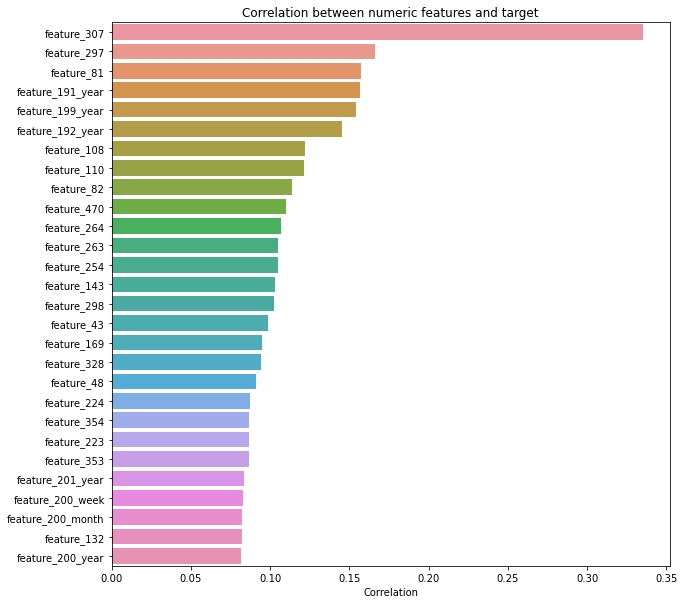

In [106]:
#Plot features which have more than 0.08 correlation with the target
plt.figure(figsize=(10,10))

#Plot - sorted correlations
sns.barplot(x=corr_df[corr_df>0.08],y=corr_df[corr_df>0.08].index).set_title('Correlation between numeric features and target')
plt.xlabel('Correlation')

Distribution

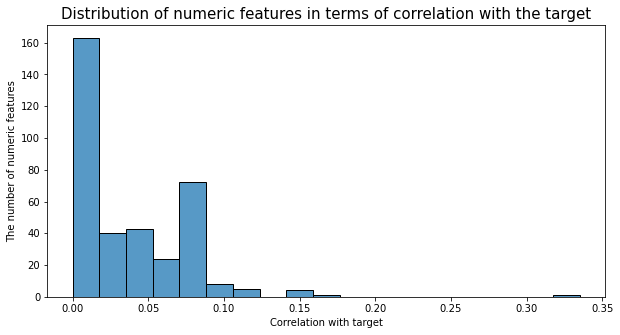

In [107]:
plt.figure(figsize=(10,5))
plt.xlabel('Correlation with target')
plt.ylabel('The number of numeric features')
sns.histplot(corr_df).set_title('Distribution of numeric features in terms of correlation with the target',size=15)
plt.show()

C:\Users\Uche Chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Uche Chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Uche Chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Uche Ch

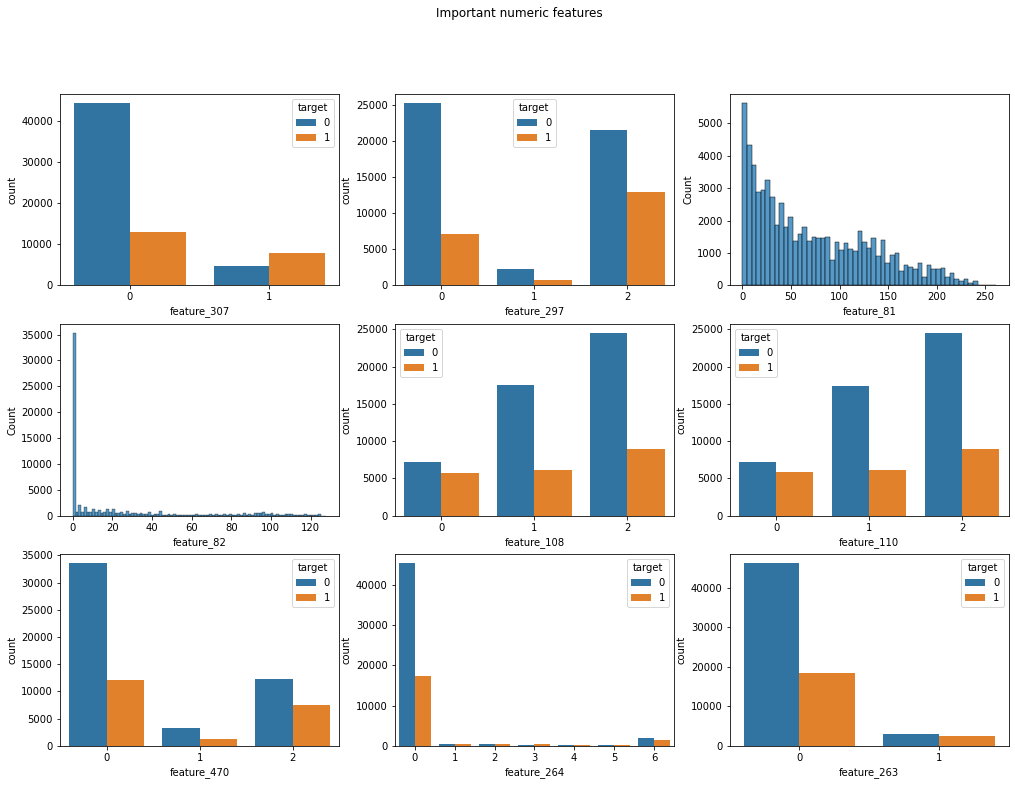

In [108]:
fig, ax = plt.subplots(3,3,figsize=(17,12))
sns.countplot(train_c.feature_307,hue=train_c.target, ax=ax[0][0])
sns.countplot(train_c.feature_297,hue=train_c.target, ax=ax[0][1])
sns.histplot(train_c.feature_81, ax=ax[0][2])
sns.histplot(train_c.feature_82, ax=ax[1][0])
sns.countplot(train_c.feature_108,hue=train_c.target, ax=ax[1][1])
sns.countplot(train_c.feature_110,hue=train_c.target, ax=ax[1][2])
sns.countplot(train_c.feature_470,hue=train_c.target, ax=ax[2][0])
sns.countplot(train_c.feature_264,hue=train_c.target, ax=ax[2][1])
sns.countplot(train_c.feature_263,hue=train_c.target, ax=ax[2][2])

plt.suptitle('Important numeric features')
plt.show()

In [109]:
#Taking square root of feature_81
train_c['feature_81_sqrt']= train_c.feature_81.apply(np.sqrt)
test_c['feature_81_sqrt']= test_c.feature_81.apply(np.sqrt)

#Binarization feature_82
train_c['feature_82_binary']= train_c['feature_82'].apply(lambda x: 0 if x==0 else 1)
test_c['feature_82_binary']= test_c['feature_82'].apply(lambda x: 0 if x==0 else 1)

#Multiplication of feature_307 and feature_82_binary
train_c['feature_82_307']= train_c['feature_307']*train_c['feature_82_binary']
test_c['feature_82_307']= test_c['feature_307']*test_c['feature_82_binary']

Add features to drop list that have insignificant correlation with target

In [110]:
#Corr less than 0.002 with target
low_corr=list(corr_df[corr_df<0.002].index)

#Add to drop list
Features_toDrop+=low_corr
print(len(low_corr),' features added to drop list')

33  features added to drop list


Features with one unique value


In [111]:
tmp=[]
for col in train_c.columns:
    #If column contains one unique value
    if (( train_c[col].nunique() <=1 )):
        #add to list
        tmp.append(col)
#Filter dataframe
train[tmp]

,feature_55,feature_100,feature_149,feature_187,feature_188,feature_190,feature_227,feature_228,feature_248,feature_249,...,feature_484,feature_487,feature_489,feature_491,feature_493,feature_495,feature_498,feature_500,feature_502,feature_505
0,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0
1,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0
2,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0
3,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0
4,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0
69996,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0
69997,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0
69998,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0


In [112]:
#Add to drop list
Features_toDrop+=list(tmp)

print(len(tmp),' features added to drop list')

59  features added to drop list


Correlation between features

In [113]:
def get_highly_correlated(df, features, threshold=0.5):
    corr_df = df[features].corr() # get correlations
    correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold)
    else:
        col1,col2,col3=list(),list(),list()
        for v, i, j in s_corr_list:
            col1.append(corr_df.index[i])
            col2.append(corr_df.columns[j])
            col3.append(v)
        col_list=[col1,col2,col3]
        return pd.DataFrame(col_list, index=['F1', 'F2','Correlation']).T.sort_values(by='Correlation',ascending=False)

Check There is more than 0.99 correlation between some features

In [114]:
F_corr_df= get_highly_correlated(train_c[Numeric_Features],Numeric_Features,threshold=0.9)
F_corr_df

,F1,F2,Correlation
0,feature_46,feature_140,1.0
520,feature_448,feature_464,1.0
511,feature_444,feature_503,1.0
513,feature_444,feature_506,1.0
514,feature_448,feature_450,1.0
...,...,...,...
447,feature_424,feature_497,-1.0
36,feature_374,feature_490,-1.0
40,feature_374,feature_497,-1.0
443,feature_424,feature_490,-1.0


Drop one of two highly correlated features

In [115]:
#Using set() to get distinct features from the column F1
drop_F1=list( set(F_corr_df.F1[F_corr_df.Correlation>0.9]) ) + list( set(F_corr_df.F1[F_corr_df.Correlation<-0.9]) )

#Drop
Features_toDrop += drop_F1
print(len(drop_F1),' features added to drop list')

188  features added to drop list


Drop unwanted features
Finally let's drop unwanted features that we have added into drop list so far

In [116]:
Features_toDrop=list(set(Features_toDrop))

train_c.drop(Features_toDrop,axis=1,inplace=True)
test_c.drop(Features_toDrop,axis=1,inplace=True)

#Remove from Categorical_Features list
Categorical_Features = [e for e in Categorical_Features
                        if e not in Features_toDrop]
#Remove from Numeric features list
Numeric_Features=[e for e in Numeric_Features
                  if e not in Features_toDrop]

print(len(Features_toDrop),' Features dropped')

221  Features dropped


In [117]:
train_c.shape, test_c.shape

((70000, 279), (30000, 278))

Encoding categorical features

In [121]:
#Create copy
train_en=train_c.copy()
test_en=test_c.copy()

for col in list(Categorical_Features):
    le = LabelEncoder()
    #fit encoder on train/test at the same time
    le.fit(pd.concat([train_en[col],test_en[col]], ignore_index=True))
    #transform 
    train_en[col]=le.transform(train_en[col])
    test_en[col]=le.transform(test_en[col])

Define and split variables

In [125]:
toDrop=['target'] + ['feature_82','feature_192_year','feature_199_year','feature_200_year','feature_201_year']

#Variables
X=train_en.drop(toDrop,axis=1)
y=train_en['target']

X_train,X_valid,y_train,y_valid = train_test_split(X, y, test_size=0.2,random_state=18)

NameError: name 'train_test_split' is not defined

Tuning

In [127]:
# Parameter grids
LGBM_params = {
    'n_estimators': 10000,
    'learning_rate': 0.01346129943895438,
    'num_leaves': 1230,
    'max_depth': 5,
    'lambda_l1': 9.014424962435049,
    'lambda_l2': 5.09941903202415,
    'min_child_samples': 56,
    'subsample': 0.8210241479916653,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'feature_fraction': 0.6000000000000001,
}

CATBOOST_params = {
    'subsample': 0.50,
    'learning_rate': 0.03,
    "max_depth": 6,
    "min_data_in_leaf": 50,
    "colsample_bylevel": 0.5,
    'random_state':42,
    'num_boost_round': 2000,
    'l2_leaf_reg': 1.0,
    'eval_metric': "AUC",
}

XGB_params = {
   'n_estimators': 14140,
    'learning_rate': 0.0111538499996725174,
    'max_depth': 4,
    'reg_alpha': 2.9735993984217104,
    'reg_lambda': 2.214625977393439,
    'scale_pos_weight': 0.9,
    'subsample': 0.7768428006197691,
    'gamma': 0.5
}

#LGBM
LGBM = LGBMClassifier(**LGBM_params)

#Catboost
CATBOOST = CatBoostClassifier(**CATBOOST_params)

#XGBoost
XGB = XGBClassifier(**XGB_params)



NameError: name 'LGBMClassifier' is not defined

In [128]:
#Returns validation score
def get_val_score(model):
    val_pred = model.predict_proba(X_valid)
    return roc_auc_score(y_valid,val_pred[:,1])

In [131]:
XGB.fit(X_train,y_train,
         eval_set=[(X_valid, y_valid)],
         early_stopping_rounds=200,verbose=100,eval_metric='auc')
#Get score
print("="*20)
print("LGBM Validation AUC : ", get_val_score(XGB))

NameError: name 'XGB' is not defined